In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("free_recall_baseline_alex.csv")

lister = []
for i in range(len(df)):
    true_list = np.isin(np.array(df["shown_words"][i].split(",")), np.array(df["recalled_words"][i].split(","))).astype(np.int32)
    lister.append(true_list)

lister = np.array(lister)

(0.0, 25.0)

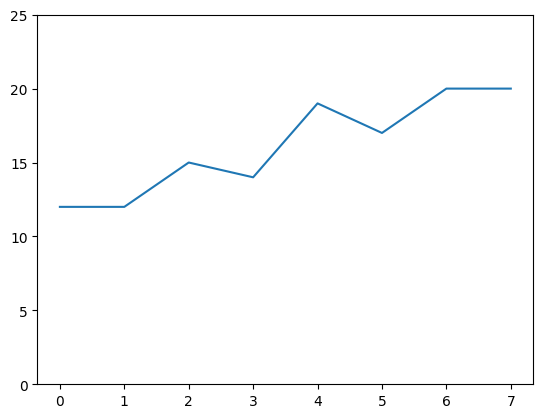

In [5]:
from matplotlib import pyplot as plt

plt.plot(lister.sum(0))
plt.ylim(0, 25)